# Extract reviews of any product from ecommerce website like amazon   & Perform emotion mining



In [1]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
} 

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup 

In [4]:
#look for web-tags in our soup, then append our data to reviewList
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break  

C:\Users\Adhik\AppData\Local\Temp\ipykernel_14204\683366494.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [6]:
# Save results to a dataframe.. 
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data 

,Rating,Title,Review,Review_Date
0,4.0,Best product in this range,"A good product, everything is good but having ...",5 November 2022
1,4.0,A superb product at this price range.,Must buy if you are looking for an earbud. But...,7 November 2022
2,4.0,Good,I like this and it's sound quality is very goo...,5 November 2022
3,4.0,VARY NICE QUALITY AND SOUND BETTERY LIFE SO GO...,Nice bas and sound quality bettry life so grea...,7 November 2022
4,4.0,Good for money,Very good for the moneyBase unit keeps charge ...,5 November 2022
...,...,...,...,...
4995,1.0,"""Left bud stopped working with 10 days""","Nice bluetooth earphones at this range ""but"" A...",Reviewed in India 🇮🇳 on 14 December 2020
4996,5.0,Very good &very nice proudect,I like this proudect very beautiful and very g...,Reviewed in India 🇮🇳 on 1 June 2022
4997,4.0,Good,Good,Reviewed in India 🇮🇳 on 18 November 2021
4998,4.0,Nice,Good,Reviewed in India 🇮🇳 on 5 November 2021


In [7]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,4.0,Best product in this range,"A good product, everything is good but having ...",5 November 2022
1,4.0,A superb product at this price range.,Must buy if you are looking for an earbud. But...,7 November 2022
2,4.0,Good,I like this and it's sound quality is very goo...,5 November 2022
3,4.0,VARY NICE QUALITY AND SOUND BETTERY LIFE SO GO...,Nice bas and sound quality bettry life so grea...,7 November 2022
4,4.0,Good for money,Very good for the moneyBase unit keeps charge ...,5 November 2022


In [8]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [9]:
data 

,Rating,Title,Review,Review_Date
0,4.0,Best product in this range,"A good product, everything is good but having ...",5 November 2022
1,4.0,A superb product at this price range.,Must buy if you are looking for an earbud. But...,7 November 2022
2,4.0,Good,I like this and it's sound quality is very goo...,5 November 2022
3,4.0,VARY NICE QUALITY AND SOUND BETTERY LIFE SO GO...,Nice bas and sound quality bettry life so grea...,7 November 2022
4,4.0,Good for money,Very good for the moneyBase unit keeps charge ...,5 November 2022
...,...,...,...,...
4995,1.0,"""Left bud stopped working with 10 days""","Nice bluetooth earphones at this range ""but"" A...",14 December 2020
4996,5.0,Very good &very nice proudect,I like this proudect very beautiful and very g...,1 June 2022
4997,4.0,Good,Good,18 November 2021
4998,4.0,Nice,Good,5 November 2021


# Data Exploration

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4818 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [12]:
data.Rating.describe()

count    5000.000000
mean        3.604800
std         1.208846
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [13]:
data.Review.isna().sum()

182

In [14]:
#for those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])

In [15]:
#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

In [16]:
data['Review_Date']= review_date[1:] 

## No. of words in each tweet

In [17]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,4.0,"A good product, everything is good but having ...",29
1,4.0,Must buy if you are looking for an earbud. But...,26
2,4.0,I like this and it's sound quality is very goo...,19
3,4.0,Nice bas and sound quality bettry life so grea...,16
4,4.0,Very good for the moneyBase unit keeps charge ...,17


## No. of stopwords

In [18]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,4.0,"A good product, everything is good but having ...",29,13
1,4.0,Must buy if you are looking for an earbud. But...,26,12
2,4.0,I like this and it's sound quality is very goo...,19,9
3,4.0,Nice bas and sound quality bettry life so grea...,16,4
4,4.0,Very good for the moneyBase unit keeps charge ...,17,6


## No. of digits

In [19]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,4.0,"A good product, everything is good but having ...",29,13,0
1,4.0,Must buy if you are looking for an earbud. But...,26,12,0
2,4.0,I like this and it's sound quality is very goo...,19,9,0
3,4.0,Nice bas and sound quality bettry life so grea...,16,4,0
4,4.0,Very good for the moneyBase unit keeps charge ...,17,6,0


## No. of URLs

In [20]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,4.0,"A good product, everything is good but having ...",29,13,0,0
1,4.0,Must buy if you are looking for an earbud. But...,26,12,0,0
2,4.0,I like this and it's sound quality is very goo...,19,9,0,0
3,4.0,Nice bas and sound quality bettry life so grea...,16,4,0,0
4,4.0,Very good for the moneyBase unit keeps charge ...,17,6,0,0


In [21]:
data.web_links.value_counts()
#no weblinks 

0    5000
Name: web_links, dtype: int64

## No. of hashtags 

In [22]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,4.0,"A good product, everything is good but having ...",29,13,0,0,0
1,4.0,Must buy if you are looking for an earbud. But...,26,12,0,0,0
2,4.0,I like this and it's sound quality is very goo...,19,9,0,0,0
3,4.0,Nice bas and sound quality bettry life so grea...,16,4,0,0,0
4,4.0,Very good for the moneyBase unit keeps charge ...,17,6,0,0,0


In [23]:
data.hashtag.value_counts()
# 4 hashtags

0    4996
1       4
Name: hashtag, dtype: int64

# Feature Engineering 

In [24]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 

In [25]:
data['Month'] = data['Review_Date'].str.split(' ').str[1] 

In [26]:
data['Year'] = data['Review_Date'].str.split(' ').str[2] 

In [27]:
data[['Review_Date', 'date', 'Month', 'Year']] 

,Review_Date,date,Month,Year
0,5 November 2022,5,November,2022
1,7 November 2022,7,November,2022
2,5 November 2022,5,November,2022
3,7 November 2022,7,November,2022
4,5 November 2022,5,November,2022
...,...,...,...,...
4995,14 December 2020,14,December,2020
4996,1 June 2022,1,June,2022
4997,18 November 2021,18,November,2021
4998,5 November 2021,5,November,2021


In [28]:
data 

,Rating,Title,Review,Review_Date,word_count,stopword_count,digits,web_links,hashtag,date,Month,Year
0,4.0,Best product in this range,"A good product, everything is good but having ...",5 November 2022,29,13,0,0,0,5,November,2022
1,4.0,A superb product at this price range.,Must buy if you are looking for an earbud. But...,7 November 2022,26,12,0,0,0,7,November,2022
2,4.0,Good,I like this and it's sound quality is very goo...,5 November 2022,19,9,0,0,0,5,November,2022
3,4.0,VARY NICE QUALITY AND SOUND BETTERY LIFE SO GO...,Nice bas and sound quality bettry life so grea...,7 November 2022,16,4,0,0,0,7,November,2022
4,4.0,Good for money,Very good for the moneyBase unit keeps charge ...,5 November 2022,17,6,0,0,0,5,November,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,"""Left bud stopped working with 10 days""","Nice bluetooth earphones at this range ""but"" A...",14 December 2020,110,40,3,0,0,14,December,2020
4996,5.0,Very good &very nice proudect,I like this proudect very beautiful and very g...,1 June 2022,9,4,0,0,0,1,June,2022
4997,4.0,Good,Good,18 November 2021,1,0,0,0,0,18,November,2021
4998,4.0,Nice,Good,5 November 2021,1,0,0,0,0,5,November,2021


In [29]:
#keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1 

,Rating,Title,Review,date,Month,Year
0,4.0,Best product in this range,"A good product, everything is good but having ...",5,November,2022
1,4.0,A superb product at this price range.,Must buy if you are looking for an earbud. But...,7,November,2022
2,4.0,Good,I like this and it's sound quality is very goo...,5,November,2022
3,4.0,VARY NICE QUALITY AND SOUND BETTERY LIFE SO GO...,Nice bas and sound quality bettry life so grea...,7,November,2022
4,4.0,Good for money,Very good for the moneyBase unit keeps charge ...,5,November,2022
...,...,...,...,...,...,...
4995,1.0,"""Left bud stopped working with 10 days""","Nice bluetooth earphones at this range ""but"" A...",14,December,2020
4996,5.0,Very good &very nice proudect,I like this proudect very beautiful and very g...,1,June,2022
4997,4.0,Good,Good,18,November,2021
4998,4.0,Nice,Good,5,November,2021


# Data Visualisation 

## Reviews by Year

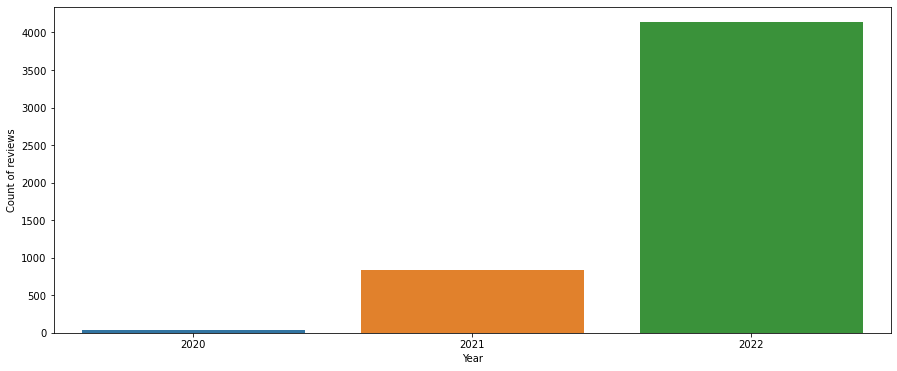

In [30]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data1.Year, order=['2020','2021','2022'] ) 
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.show()

## Reviews by Month-Year

In [31]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 

In [32]:
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)

In [33]:
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 

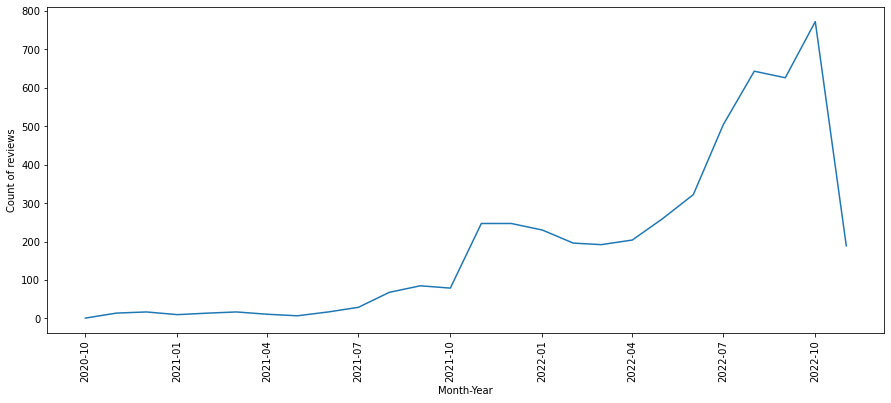

In [34]:
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

#sell of BoAt airdopes increased from oct 2021 and peaked during oct 2022-- Graph shows sell drop in nov 2022 because we could capture data till nov 1st week only.(nov 2022 is yet to end)

## Reviews by Stars 

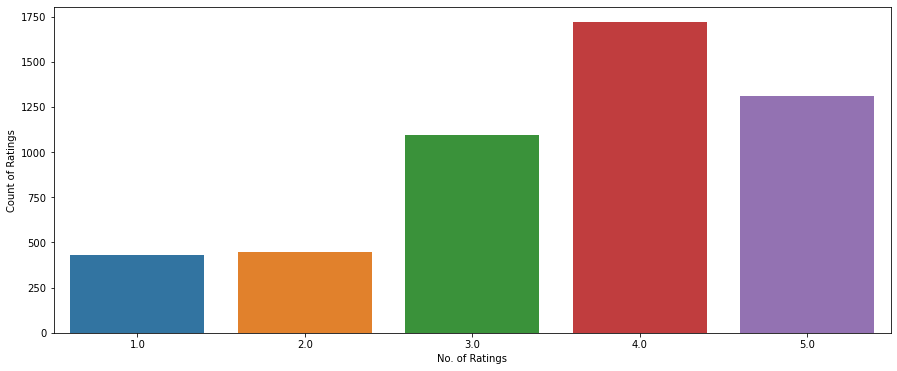

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

# Text Preprocessing 

In [36]:
#Keeping features which are imp for time being
data2 = data1[['Review']] 
data2 

,Review
0,"A good product, everything is good but having ..."
1,Must buy if you are looking for an earbud. But...
2,I like this and it's sound quality is very goo...
3,Nice bas and sound quality bettry life so grea...
4,Very good for the moneyBase unit keeps charge ...
...,...
4995,"Nice bluetooth earphones at this range ""but"" A..."
4996,I like this proudect very beautiful and very g...
4997,Good
4998,Good


## Removing punctuations, digits, emogies and normalising reviews

In [37]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)


In [38]:
corpus 

['a good product everything is good but having a gripping issue while removing from case sometimes fingur slips on airdopes while removing from case and it will frustrat you',
 'must buy if you are looking for an earbud but the  is a little over priced if theres an offer for below  must try',
 'i like this and its sound quality is very good noise cancellation is also good and is in budget',
 'nice bas and sound quality bettry life so great and long time singing enjoy this product',
 'very good for the moneybase unit keeps charge for quite a number of daysnoise cancellation is good',
 'i bought these airdopes in oct  and exactly after a year few days in oct  they stopped working out of nowhere they worked great for a year i had no issue no problems and i took care of them too idk why it suddenly stopped working the problem started when it stopped charging  days back and the person whom i took it to repair said that jack is gone although it worked amazing for me for a year but then also 

In [39]:
data2['clean_reviews'] = corpus 

In [40]:
data2 

,Review,clean_reviews
0,"A good product, everything is good but having ...",a good product everything is good but having a...
1,Must buy if you are looking for an earbud. But...,must buy if you are looking for an earbud but ...
2,I like this and it's sound quality is very goo...,i like this and its sound quality is very good...
3,Nice bas and sound quality bettry life so grea...,nice bas and sound quality bettry life so grea...
4,Very good for the moneyBase unit keeps charge ...,very good for the moneybase unit keeps charge ...
...,...,...
4995,"Nice bluetooth earphones at this range ""but"" A...",nice bluetooth earphones at this range but ama...
4996,I like this proudect very beautiful and very g...,i like this proudect very beautiful and very good
4997,Good,good
4998,Good,good


## Removing stopwords

In [41]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,"A good product, everything is good but having ...",a good product everything is good but having a...,good product everything good gripping issue re...
1,Must buy if you are looking for an earbud. But...,must buy if you are looking for an earbud but ...,must buy looking earbud little priced theres o...
2,I like this and it's sound quality is very goo...,i like this and its sound quality is very good...,like sound quality good noise cancellation als...
3,Nice bas and sound quality bettry life so grea...,nice bas and sound quality bettry life so grea...,nice bas sound quality bettry life great long ...
4,Very good for the moneyBase unit keeps charge ...,very good for the moneybase unit keeps charge ...,good moneybase unit keeps charge quite number ...
5,I bought these airdopes in oct 2021 and exactl...,i bought these airdopes in oct and exactly af...,bought airdopes oct exactly year days oct stop...
6,Noise cancellation is not much satisfying exce...,noise cancellation is not much satisfying exce...,noise cancellation much satisfying except ever...
7,I got this during Amazon Great Indian festival...,i got this during amazon great indian festival...,got amazon great indian festival rs guess best...
8,This headphone has quite good base but while i...,this headphone has quite good base but while i...,headphone quite good base call perspn able hea...
9,Sound quality is not great but it offers conve...,sound quality is not great but it offers conve...,sound quality great offers convenience pairs q...


In [42]:
#Tokenisation
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10) 

0    [good, product, everything, good, gripping, is...
1    [must, buy, looking, earbud, little, priced, t...
2    [like, sound, quality, good, noise, cancellati...
3    [nice, bas, sound, quality, bettry, life, grea...
4    [good, moneybase, unit, keeps, charge, quite, ...
5    [bought, airdopes, oct, exactly, year, days, o...
6    [noise, cancellation, much, satisfying, except...
7    [got, amazon, great, indian, festival, rs, gue...
8    [headphone, quite, good, base, call, perspn, a...
9    [sound, quality, great, offers, convenience, p...
Name: absolute_clean_reviews, dtype: object

In [43]:
#lemmatisation
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10) 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adhik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adhik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [good, product, everything, good, gripping, is...
1    [must, buy, looking, earbud, little, priced, t...
2    [like, sound, quality, good, noise, cancellati...
3    [nice, ba, sound, quality, bettry, life, great...
4    [good, moneybase, unit, keep, charge, quite, n...
5    [bought, airdopes, oct, exactly, year, day, oc...
6    [noise, cancellation, much, satisfying, except...
7    [got, amazon, great, indian, festival, r, gues...
8    [headphone, quite, good, base, call, perspn, a...
9    [sound, quality, great, offer, convenience, pa...
Name: absolute_clean_reviews, dtype: object

In [44]:
#joining tokens into sentence
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,"A good product, everything is good but having ...",a good product everything is good but having a...,good product everything good gripping issue re...
1,Must buy if you are looking for an earbud. But...,must buy if you are looking for an earbud but ...,must buy looking earbud little priced there of...
2,I like this and it's sound quality is very goo...,i like this and its sound quality is very good...,like sound quality good noise cancellation als...
3,Nice bas and sound quality bettry life so grea...,nice bas and sound quality bettry life so grea...,nice ba sound quality bettry life great long t...
4,Very good for the moneyBase unit keeps charge ...,very good for the moneybase unit keeps charge ...,good moneybase unit keep charge quite number d...
5,I bought these airdopes in oct 2021 and exactl...,i bought these airdopes in oct and exactly af...,bought airdopes oct exactly year day oct stopp...
6,Noise cancellation is not much satisfying exce...,noise cancellation is not much satisfying exce...,noise cancellation much satisfying except ever...
7,I got this during Amazon Great Indian festival...,i got this during amazon great indian festival...,got amazon great indian festival r guess best ...
8,This headphone has quite good base but while i...,this headphone has quite good base but while i...,headphone quite good base call perspn able hea...
9,Sound quality is not great but it offers conve...,sound quality is not great but it offers conve...,sound quality great offer convenience pair qui...


# Basic Feature Extraction 

## Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  

In [46]:
print(vectorizer.vocabulary_)   

{'good': 2095, 'product': 3860, 'everything': 1738, 'gripping': 2178, 'issue': 2550, 'removing': 4209, 'case': 852, 'sometimes': 4644, 'fingur': 1904, 'slip': 4592, 'airdopes': 136, 'frustrat': 1992, 'must': 3238, 'buy': 735, 'looking': 2890, 'earbud': 1575, 'little': 2860, 'priced': 3812, 'there': 4976, 'offer': 3376, 'try': 5150, 'like': 2832, 'sound': 4672, 'quality': 3999, 'noise': 3314, 'cancellation': 799, 'also': 179, 'budget': 696, 'nice': 3289, 'ba': 388, 'bettry': 557, 'life': 2816, 'great': 2168, 'long': 2878, 'time': 5044, 'singing': 4562, 'enjoy': 1686, 'moneybase': 3143, 'unit': 5205, 'keep': 2695, 'charge': 910, 'quite': 4053, 'number': 3350, 'daysnoise': 1279, 'bought': 640, 'oct': 3369, 'exactly': 1744, 'year': 5586, 'day': 1267, 'stopped': 4761, 'working': 5516, 'nowhere': 3345, 'worked': 5515, 'problem': 3837, 'took': 5087, 'care': 841, 'idk': 2397, 'suddenly': 4807, 'started': 4737, 'charging': 919, 'back': 396, 'person': 3626, 'repair': 4214, 'said': 4380, 'jack': 

In [47]:
print(vectorizer.get_feature_names()) 
# we can notice that there are many hindi stopwords which are not removed by english stopword dictionary..
# hindi adjectives are also useless here since we do not have affine.csv type lexion for hindi adjectives,
#though hindi adjectives are retained so that they are depicted in wordcloud

['aa', 'aaa', 'aacha', 'aage', 'aagya', 'aaj', 'aajate', 'aalva', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhh', 'abhi', 'abi', 'abit', 'able', 'abovesound', 'abox', 'abroad', 'absent', 'absentfalls', 'absolute', 'absolutely', 'abt', 'ac', 'accept', 'acceptable', 'acceptableamazon', 'accepted', 'acceptreject', 'access', 'accessibility', 'accessory', 'accha', 'acche', 'acchi', 'accident', 'accidentally', 'accommodated', 'according', 'accumulate', 'accuracy', 'accurate', 'acha', 'achcha', 'achchaboat', 'achchha', 'achchi', 'ache', 'achha', 'achhe', 'achi', 'aching', 'acknowledgement', 'acoording', 'acoustic', 'across', 'acting', 'action', 'activate', 'active', 'activity', 'actract', 'actual', 'actually', 'actuallyi', 'actualy', 'adaptable', 'adapter', 'add', 'added', 'adding', 'additional', 'addressing', 'adequate', 'adhar', 'adjust', 'adjustable', 'adjusted', 'adjustedanother', 'adjusting', 'adjustment', 'adress', 'advance', 'advantage', 'advertised', '

## Removing some more stopwords

In [48]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya'] 

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,"A good product, everything is good but having ...",a good product everything is good but having a...,good product everything good gripping issue re...
1,Must buy if you are looking for an earbud. But...,must buy if you are looking for an earbud but ...,must buy looking earbud little priced theres o...
2,I like this and it's sound quality is very goo...,i like this and its sound quality is very good...,like sound quality good noise cancellation als...
3,Nice bas and sound quality bettry life so grea...,nice bas and sound quality bettry life so grea...,nice bas sound quality bettry life great long ...
4,Very good for the moneyBase unit keeps charge ...,very good for the moneybase unit keeps charge ...,good moneybase unit keeps charge quite number ...
5,I bought these airdopes in oct 2021 and exactl...,i bought these airdopes in oct and exactly af...,bought airdopes oct exactly year days oct stop...
6,Noise cancellation is not much satisfying exce...,noise cancellation is not much satisfying exce...,noise cancellation much satisfying except ever...
7,I got this during Amazon Great Indian festival...,i got this during amazon great indian festival...,got amazon great indian festival rs guess best...
8,This headphone has quite good base but while i...,this headphone has quite good base but while i...,headphone quite good base call perspn able hea...
9,Sound quality is not great but it offers conve...,sound quality is not great but it offers conve...,sound quality great offers convenience pairs q...


## Let's see how can bigrams and trigrams can be included here

In [49]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

In [50]:
count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,able,able connect,able hear,able hear clearly,able hear properly,able hear voice,able listen,absolute,absolutely,absolutely amazing,...,पसद,फन,बटर,बत,बहत,रह,वल,सउड,सकत,हत
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,able,able connect,able hear,able hear clearly,able hear properly,able hear voice,able listen,absolute,absolutely,absolutely amazing,...,रह,लए,वल,सउड,सकत,सफ,सफ नह,सह,सह नह,हत
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
data2 

,Review,clean_reviews,absolute_clean_reviews
0,"A good product, everything is good but having ...",a good product everything is good but having a...,good product everything good gripping issue re...
1,Must buy if you are looking for an earbud. But...,must buy if you are looking for an earbud but ...,must buy looking earbud little priced theres o...
2,I like this and it's sound quality is very goo...,i like this and its sound quality is very good...,like sound quality good noise cancellation als...
3,Nice bas and sound quality bettry life so grea...,nice bas and sound quality bettry life so grea...,nice bas sound quality bettry life great long ...
4,Very good for the moneyBase unit keeps charge ...,very good for the moneybase unit keeps charge ...,good moneybase unit keeps charge quite number ...
...,...,...,...
4995,"Nice bluetooth earphones at this range ""but"" A...",nice bluetooth earphones at this range but ama...,nice bluetooth earphones range amazon really t...
4996,I like this proudect very beautiful and very g...,i like this proudect very beautiful and very good,like proudect beautiful good
4997,Good,good,good
4998,Good,good,good


# Sentiment Analysis

In [53]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1') 

In [54]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [55]:
sent = []
a = 0 

In [56]:
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   

In [57]:
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']]  

,absolute_clean_reviews,sentiment_value
0,good product everything good gripping issue re...,6
1,must buy looking earbud little priced theres o...,0
2,like sound quality good noise cancellation als...,8
3,nice bas sound quality bettry life great long ...,8
4,good moneybase unit keeps charge quite number ...,6
...,...,...
4995,nice bluetooth earphones range amazon really t...,-12
4996,like proudect beautiful good,8
4997,good,3
4998,good,3


In [58]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]   

,absolute_clean_reviews,sentiment_value,sentiment
0,good product everything good gripping issue re...,6,Positive
1,must buy looking earbud little priced theres o...,0,Neutral
2,like sound quality good noise cancellation als...,8,Positive
3,nice bas sound quality bettry life great long ...,8,Positive
4,good moneybase unit keeps charge quite number ...,6,Positive
...,...,...,...
4995,nice bluetooth earphones range amazon really t...,-12,Negative
4996,like proudect beautiful good,8,Positive
4997,good,3,Positive
4998,good,3,Positive


In [59]:
data2.sentiment.value_counts()

Positive    3304
Neutral     1061
Negative     635
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

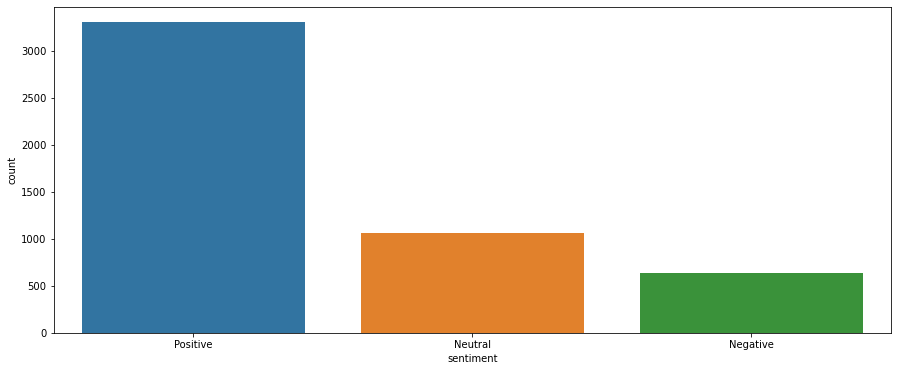

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(data2.sentiment) 

# Word cloud for Positive words 

In [61]:
positive = []
negative = []
neutral = [] 

In [62]:
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  

In [63]:
pos =' '.join(positive) 

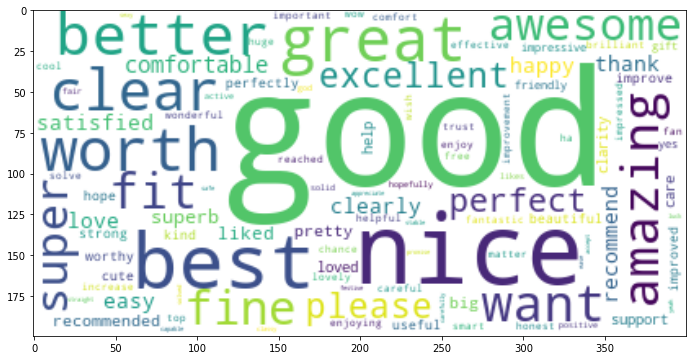

In [64]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')   

# Word cloud for Negative words 

In [65]:
neg = ' '.join(negative) 

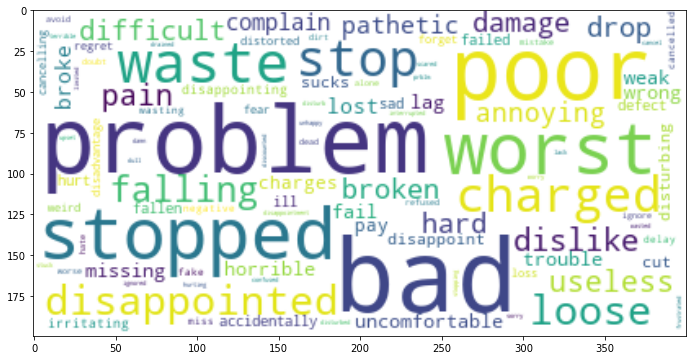

In [66]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')  

# Word cloud for All words 

In [67]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)

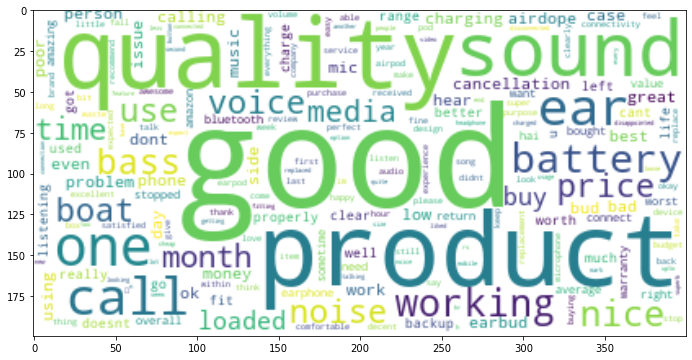

In [68]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear') 

# Thank You